# Flood - Visualize GRACE Features
<h3> 
Aaron Trefler <br/>
JPL <br/>
Created: 06/23/2016 <br/>
</h3>

# I. Setup

In [355]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.io as sio 

from IPython.display import display, HTML

In [288]:
%pylab inline
# %matplotlib

Populating the interactive namespace from numpy and matplotlib


In [289]:
# define directories
dir_flood = '../../Raw Data/Flood Observatory/'
dir_python_data = '../Data/'
dir_grace = '../../Work_Matlab/Data/'
dir_figures = '../Figures/'

# II. Load Data

## GRACE

In [361]:
# unpickle grace variables
f = open(dir_python_data + 'grace_uncertainty.p')
grace_uncertainty = pickle.load(f)
f.close()

In [357]:
# unpickle grace features
f = open(dir_python_data + 'grace_features.p')
[
    grace_lwe,
    grace_lwe_norm,
    grace_lwe_rank_norm,
    grace_lwe_clim_norm,
    grace_lwe_clim_rank_norm,
    grace_lwe_noClim_norm,
    grace_lwe_noClim_rank_norm] = pickle.load(f)
f.close()

In [296]:
# GRACE MASCON-CRI Matlab files
mat_content_1 = sio.loadmat(dir_grace +'grace_features')

In [297]:
# GRACE MASCON-CRI data description
print sio.whosmat(dir_grace + 'grace_features')

[('lwe', (720, 360, 152), 'double'), ('lwe_clim_norm', (720, 360, 152), 'double'), ('lwe_clim_rank_norm', (720, 360, 152), 'double'), ('lwe_noClim_norm', (720, 360, 152), 'double'), ('lwe_noClim_rank_norm', (720, 360, 152), 'double'), ('lwe_norm', (720, 360, 152), 'double'), ('lwe_rank_norm', (720, 360, 152), 'double')]


In [298]:
grace_lwe = mat_content_1['lwe']
grace_lwe_norm = mat_content_1['lwe_norm']
grace_lwe_rank_norm = mat_content_1['lwe_rank_norm']

grace_lwe_clim_norm = mat_content_1['lwe_clim_norm']
grace_lwe_clim_rank_norm = mat_content_1['lwe_clim_rank_norm']

grace_lwe_noClim_norm = mat_content_1['lwe_noClim_norm']
grace_lwe_noClim_rank_norm = mat_content_1['lwe_noClim_rank_norm']

## Flood Observatory

In [293]:
# name of preprocessed flood dataframe
df_name = 'df_flood_grace_time_location_features'

In [294]:
# FO data previously cleaned by FloodObservatory_Preprocess.py
df_flood_grace = pd.read_csv(dir_python_data + df_name + '.csv')
df_flood_grace = df_flood_grace.drop('Unnamed: 0', axis=1)
df_flood_grace.head(1)

,Register #,Began,Date Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity *,Affected sq km,...,Centroid GRACE Lat,Days before MASCON,MASCON Index,GRACE lwe,GRACE lwe norm,GRACE lwe rank norm,GRACE lwe clim norm,GRACE lwe clim rank norm,GRACE lwe noClim norm,GRACE lwe noClim rank norm
0,4356.0,8-May-16,08-May-16,11-May-16,4.0,0.0,0.0,Heavy Rain,1.0,197079.53,...,230.0,52.0,151.0,24.068059,2.431435,1.715023,-0.790347,-0.968847,3.367511,1.715023


# III. Visualization

In [299]:
# visualization variables
tps = shape(grace_lwe)[2]
df = df_flood_grace

## (1) Location Mapping for Flood Events

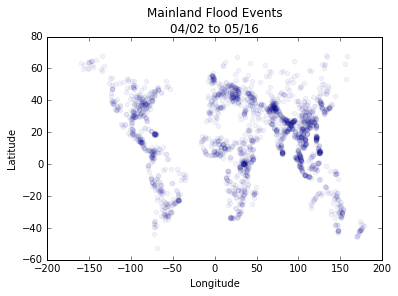

In [354]:
# frequency of floods across the world
x = df['Centroid X']
y = df['Centroid Y']

plt.scatter(x, y, alpha=0.05)
plt.title('Mainland Flood Events\n04/02 to 05/16')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(dir_figures + 'floods_events.png')

## (2) Time Mapping for Flood Events

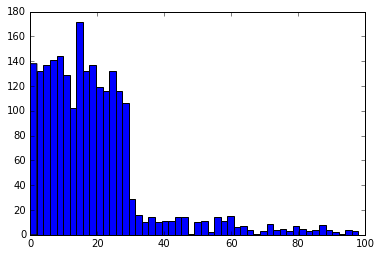

In [251]:
# plot histogram of differences b/w flood and GRACE-MASCON dates
plt.hist(df['Days before MASCON'], bins=50)
plt.show()

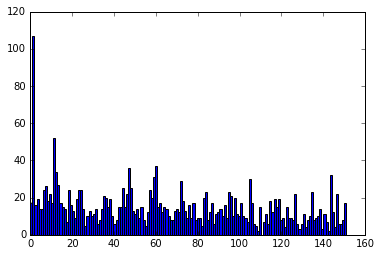

In [252]:
# plot histogram of GRACE MASCON time indexes of floods
plt.hist(df['MASCON Index'], bins = tps)
plt.show()

##  (3) GRACE LWE for Complete Dataset

In [277]:
# plot_grace_complete_dataset_histogram: Plots grace metrics for entire dataset as a histogram
#
# Parameters:
# metric_mascon: GRACE MASCON brick with metric values
# metric_description: to be used in x-axis title

def plot_grace_complete_dataset_histogram(metric_description, metric_mascon):
    
    # convert GRACE metric values to Pandas Series
    d1, d2, d3 = shape(metric_mascon)
    metric_series = pd.Series(data = metric_mascon.reshape(d1*d2*d3))
    
    # remove NaNs
    metric_series = metric_series[~pd.isnull(metric_series)];
    
    # histogram
    y,_,_ = plt.hist(metric_series, bins=50)
    plt.title('Ground Water Level for Entire GRACE Mission')
    plt.xlabel(metric_description)
    plt.ylabel('Number Grid Cells\n04/02 to 05/16')
    
    # add mean and median lines
    y_max = int(y.max())
    metric_median = median(metric_series)
    plt.plot( [metric_median]*y_max , range(y_max), 'r', linewidth=1.5)
    
    plt.show()

### (3a) Numerical Features (un-ranked)

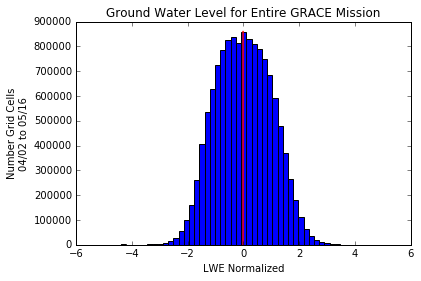

In [278]:
plot_grace_complete_dataset_histogram('LWE Normalized', grace_lwe_norm)

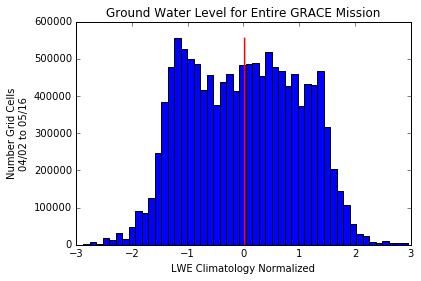

In [280]:
plot_grace_complete_dataset_histogram('LWE Climatology Normalized', grace_lwe_clim_norm)

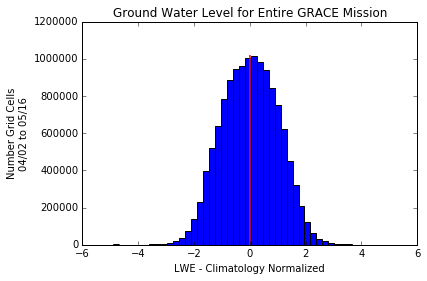

In [281]:
plot_grace_complete_dataset_histogram('LWE - Climatology Normalized', grace_lwe_noClim_norm)

### (3b) Ordinal Features (ranked)

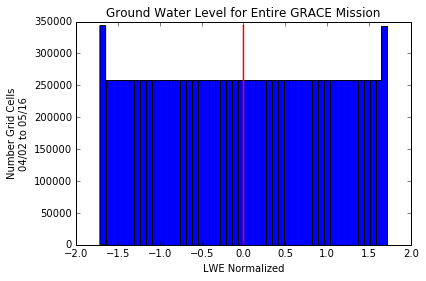

In [285]:
plot_grace_complete_dataset_histogram('LWE Rank Normalized', grace_lwe_rank_norm)

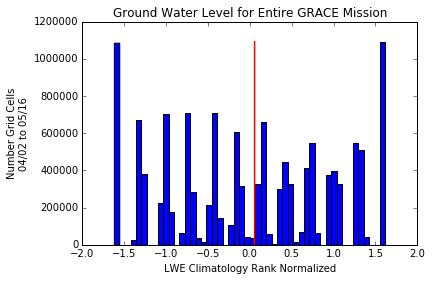

In [314]:
plot_grace_complete_dataset_histogram('LWE Climatology Rank Normalized', grace_lwe_clim_rank_norm)

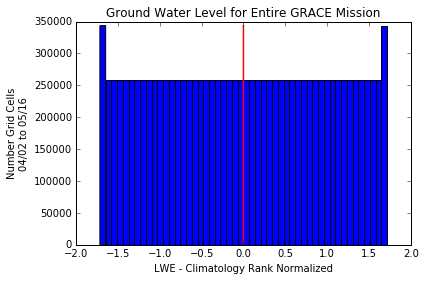

In [315]:
plot_grace_complete_dataset_histogram('LWE - Climatology Rank Normalized', grace_lwe_noClim_rank_norm)

## (4) GRACE LWE for Flood Events

In [307]:
# plot_grace_feature_histogram: Plots grace feature at time of each flood as a histogram
#
# Parameters:
# feature_values: Pandas Series of feature values
# feature_description: to be used in x-axis title

def plot_grace_feature_histogram(feature_description, feature_values):
    
    # GRACE levels during flood events
    y,_,_ = plt.hist(feature_values, bins=50)
    plt.title('Ground Water Level Prior to Flood')
    plt.xlabel(feature_description)
    plt.ylabel('Number of Floods\n04/02 to 05/16')
    
    # add mean and median lines
    y_max = int(y.max())
    feature_median = median(feature_values)
    plt.plot( [feature_median]*y_max , range(y_max), 'r', linewidth=1.5)
    
    plt.show()

### (4a) Numerical Features (un-ranked)

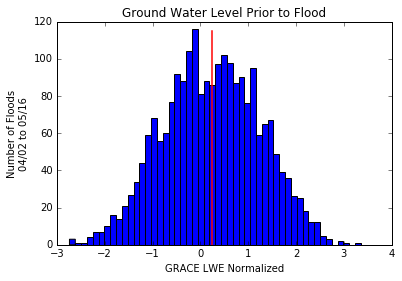

In [308]:
plot_grace_feature_histogram('GRACE LWE Normalized', df['GRACE lwe norm'])

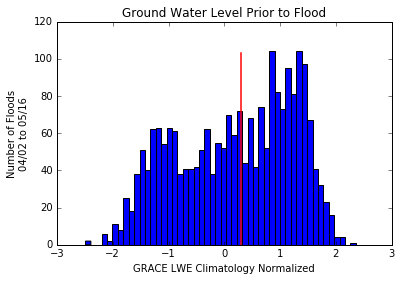

In [309]:
plot_grace_feature_histogram('GRACE LWE Climatology Normalized', df['GRACE lwe clim norm'])

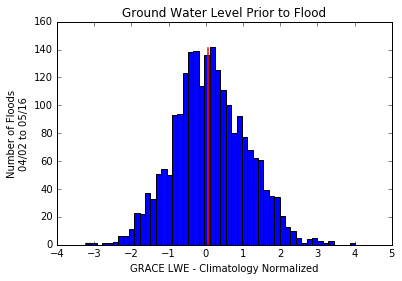

In [310]:
plot_grace_feature_histogram('GRACE LWE - Climatology Normalized', df['GRACE lwe noClim norm'])

### (4b) Ordinal Features (ranked)

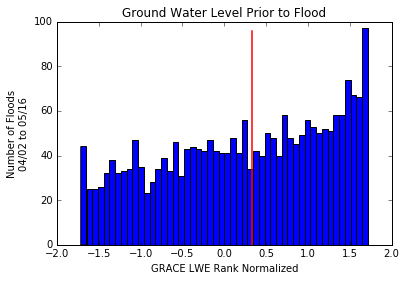

In [311]:
plot_grace_feature_histogram('GRACE LWE Rank Normalized', df['GRACE lwe rank norm'])

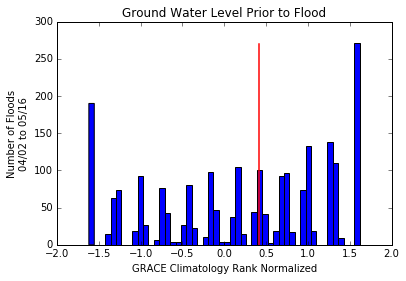

In [312]:
plot_grace_feature_histogram('GRACE Climatology Rank Normalized', df['GRACE lwe clim rank norm'])

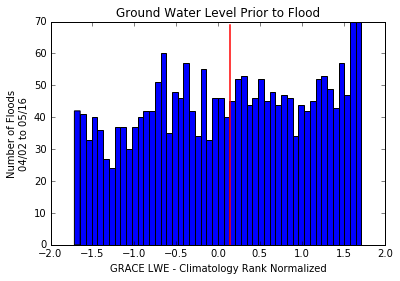

In [313]:
plot_grace_feature_histogram('GRACE LWE - Climatology Rank Normalized', df['GRACE lwe noClim rank norm'])

# Functions

In [238]:
# co-ordinates
d1 = 200
d2 = 600
grace = grace_lwe_climRemStd_adj
climatology = grace_lwe_climatology_adj
    
# create timeseries
grace_timeseries = grace[d1,d2,:]
climatology_timeseries = climatology[d1,d2,:]

# find floods at grid location

    
# plot timeseries
plt.subplot(2,1,1)
plt.plot(grace_timeseries)
plt.subplot(2,1,2)
plt.plot(climatology_timeseries)

plt.show()

NameError: name 'grace_lwe_climRemStd_adj' is not defined

In [ ]:
shape(climatology)